In [85]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import torchvision
%matplotlib inline

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [113]:
def fetch(k, b):
    """return dataloader corresponding to target k.
    """

    # fetch dataset
    dataset = datasets.MNIST('../data', train=False, download=True, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]))

    # select appropriate indices
    idx = dataset.train_labels==k

    # subset raw dataset by indices
    dset_train = torch.utils.data.dataset.Subset(dataset, np.where(idx==True)[0])

    # wrap dataset into a dataloader
    dl_train = torch.utils.data.DataLoader(dset_train, batch_size=b, shuffle=True)
    
    return dl_train

In [50]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1)  # no padding so we lose 2 pixels
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1)  # no padding so we lose 2 pixels
        self.dropout1 = nn.Dropout2d(p=0.25)
        self.dropout2 = nn.Dropout2d(p=0.5)
        self.fc1 = nn.Linear(in_features=64*12*12, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=10)

    def forward(self, x):
        x = self.conv1(x)  # input becomes 32x26x26
        x = F.relu(x)
        x = self.conv2(x)  # input becomes 64x24x24
        x = F.max_pool2d(x, kernel_size=2)  # input becomes 64x12x12
        x = self.dropout1(x)
        x = torch.flatten(x, 1)  # flatten into a single 9,216 dim vector
        x = self.fc1(x)  # input goes from 9216 to 128
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)  # input goes from 128 to 10
        return x

In [121]:
model = Net()
optimizer = optim.Adadelta(model.parameters(), lr=1e-3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


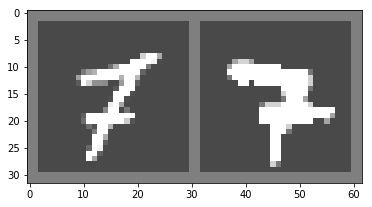

In [122]:
d = fetch(7, 2)
dataiter = iter(d)
X_l, y_l = dataiter.next()
imshow(torchvision.utils.make_grid(X_l))

In [123]:
n_epochs = 100

for i in range(n_epochs):
    
    # step 1: train on labeled data
    optimizer.zero_grad()
    output = model(X_l)
    loss = F.cross_entropy(output, y_l)
    loss.backward()
    optimizer.step()
    if i % (n_epochs / 10) == 0:
        print(loss.item())
        
    # step 2: view probabilities on unlabeled data
    X_u, y_u = dataiter.next()
    output = model(X_u)
    probs = F.softmax(output, dim=1)
    pred = probs.argmax(dim=1, keepdim=True)
    if i % (n_epochs / 10) == 0:
        print(pred)

2.2059035301208496
tensor([[9],
        [3]])
2.214153528213501
tensor([[9],
        [9]])
2.1456775665283203
tensor([[7],
        [7]])
2.101571798324585
tensor([[9],
        [7]])
2.101774215698242
tensor([[7],
        [7]])
1.974748134613037
tensor([[7],
        [7]])
1.986077070236206
tensor([[7],
        [7]])
1.9112563133239746
tensor([[7],
        [7]])
1.869182825088501
tensor([[7],
        [7]])
1.7977864742279053
tensor([[7],
        [7]])
